In [64]:
# setting up notebook
import requests
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [65]:
#API Set-Up
url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [67]:
#elements are the different players
elements_df = pd.DataFrame(json['elements'])
element_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])
elements_df


,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,...,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-3,3,0,3,0.0,...,687,279,687,279,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,...,634,230,653,232,NaN,,NaN,,NaN,
2,0.0,0.0,41270,0,0,-1,1,0,2,0.0,...,221,62,276,90,NaN,,4.0,,NaN,
3,100.0,100.0,54694,0,0,-6,6,2,3,4.0,...,28,15,41,26,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,1.5,...,299,97,326,115,NaN,,5.0,,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,NaN,NaN,448487,0,0,0,0,0,1,0.0,...,490,28,544,61,NaN,,NaN,,NaN,
683,0.0,0.0,209353,0,0,-1,1,0,4,0.0,...,420,65,491,67,NaN,,NaN,,NaN,
684,NaN,NaN,465551,0,0,0,0,0,2,0.0,...,494,196,548,208,NaN,,NaN,,NaN,
685,100.0,100.0,73314,0,0,-2,2,0,4,1.3,...,203,49,331,46,NaN,,NaN,,NaN,


In [68]:
#looking at which columns I will use.b
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [69]:
#Creating a data frame with important column called main_df
main_df = elements_df[
    ['web_name','first_name','team','element_type','now_cost','selected_by_percent','transfers_in','transfers_out','form','event_points','total_points','bonus','points_per_game','value_season','minutes','goals_scored','assists','ict_index','clean_sheets','saves']
]
main_df

,web_name,first_name,team,element_type,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves
0,Özil,Mesut,1,3,67,0.5,3441,54702,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
1,Sokratis,Sokratis,1,2,48,0.1,10266,19112,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
2,David Luiz,David,1,2,54,0.9,76447,120122,1.2,0,40,0,2.1,7.4,1344,1,0,41.0,3,0
3,Aubameyang,Pierre-Emerick,1,3,114,9.4,1116383,3574493,3.0,2,108,10,4.3,9.5,2007,9,1,144.9,7,0
4,Cédric,Cédric,1,2,46,0.3,29526,52537,0.5,0,28,3,2.8,6.1,744,0,1,29.2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Söndergaard,Andreas,20,1,40,0.3,31611,15736,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
683,Cutrone,Patrick,20,4,59,0.0,3443,3419,0.0,0,2,0,1.0,0.3,23,0,0,0.2,0,0
684,Lonwijk,Nigel,20,2,40,0.0,1275,981,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0
685,Willian José,Willian José,20,4,68,0.2,45569,36387,1.3,0,20,0,2.2,2.9,660,0,1,27.8,3,0


In [70]:
teams_df
#problem spotted: games played hasn't been updated in the API
#easiest solution is to manually insert games played for each team

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1190,1210,1170,1210,1190,1200,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1150,1150,1150,1150,1180,1210,2
2,36,0,None,3,0,Brighton,0,0,0,BHA,...,None,False,0,1120,1100,1150,1180,1090,1100,131
3,90,0,None,4,0,Burnley,0,0,0,BUR,...,None,False,0,1070,1080,1120,1190,1010,1030,43
4,8,0,None,5,0,Chelsea,0,0,0,CHE,...,None,False,0,1250,1300,1240,1280,1270,1310,4
5,31,0,None,6,0,Crystal Palace,0,0,0,CRY,...,None,False,0,1120,1110,1100,1150,1020,1050,6
6,11,0,None,7,0,Everton,0,0,0,EVE,...,None,False,0,1240,1160,1150,1170,1210,1250,7
7,54,0,None,8,0,Fulham,0,0,0,FUL,...,None,False,0,1090,1100,1020,1030,1020,1020,34
8,13,0,None,9,0,Leicester,0,0,0,LEI,...,None,False,0,1240,1270,1190,1190,1200,1180,26
9,2,0,None,10,0,Leeds,0,0,0,LEE,...,None,False,0,1130,1170,1060,1110,1130,1160,9


In [71]:
#create new dictionary
games_played = [['Arsenal','30'], ['Aston Villa','29'], ['Brighton','30'], ['Burnley','30'], ['Chelsea','30'], ['Crystal Palace','29'], ['Everton','28'], ['Fulham','31'], ['Leicester','30'], ['Leeds','30'], ['Liverpool','30'], ['Man City','31'], ['Man Utd','30'], ['Newcastle','30'], ['Sheffield Utd','30'], ['Southampton','30'], ['Spurs','30'], ['West Brom','30'], ['West Ham','29'], ['Wolves','29']]

#turn into a DataFrame
played_df = pd.DataFrame(games_played,columns=['team','games_played'])
print(played_df)

#overwrite existing DataFrame column
teams_df['played'] = played_df['games_played'].astype(str).astype(int)

#looking good:
teams_df

              team games_played
0          Arsenal           30
1      Aston Villa           29
2         Brighton           30
3          Burnley           30
4          Chelsea           30
5   Crystal Palace           29
6          Everton           28
7           Fulham           31
8        Leicester           30
9            Leeds           30
10       Liverpool           30
11        Man City           31
12         Man Utd           30
13       Newcastle           30
14   Sheffield Utd           30
15     Southampton           30
16           Spurs           30
17       West Brom           30
18        West Ham           29
19          Wolves           29


,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,30,0,0,ARS,...,None,False,0,1190,1210,1170,1210,1190,1200,1
1,7,0,None,2,0,Aston Villa,29,0,0,AVL,...,None,False,0,1150,1150,1150,1150,1180,1210,2
2,36,0,None,3,0,Brighton,30,0,0,BHA,...,None,False,0,1120,1100,1150,1180,1090,1100,131
3,90,0,None,4,0,Burnley,30,0,0,BUR,...,None,False,0,1070,1080,1120,1190,1010,1030,43
4,8,0,None,5,0,Chelsea,30,0,0,CHE,...,None,False,0,1250,1300,1240,1280,1270,1310,4
5,31,0,None,6,0,Crystal Palace,29,0,0,CRY,...,None,False,0,1120,1110,1100,1150,1020,1050,6
6,11,0,None,7,0,Everton,28,0,0,EVE,...,None,False,0,1240,1160,1150,1170,1210,1250,7
7,54,0,None,8,0,Fulham,31,0,0,FUL,...,None,False,0,1090,1100,1020,1030,1020,1020,34
8,13,0,None,9,0,Leicester,30,0,0,LEI,...,None,False,0,1240,1270,1190,1190,1200,1180,26
9,2,0,None,10,0,Leeds,30,0,0,LEE,...,None,False,0,1130,1170,1060,1110,1130,1160,9


In [72]:
# aim is to merdge this df to the main df
element_types_df

,id,plural_name,plural_name_short,singular_name,singular_name_short,squad_select,squad_min_play,squad_max_play,ui_shirt_specific,sub_positions_locked,element_count
0,1,Goalkeepers,GKP,Goalkeeper,GKP,2,1,1,True,[12],80
1,2,Defenders,DEF,Defender,DEF,5,3,5,False,[],239
2,3,Midfielders,MID,Midfielder,MID,5,2,5,False,[],279
3,4,Forwards,FWD,Forward,FWD,3,1,3,False,[],89


In [74]:

#merging elements_types_df onto main_df
#where element type in main = id on element_type_df
main_df = pd.merge(left=main_df,
                   right=element_types_df[['id','singular_name']],
                   left_on='element_type', 
                right_on='id', how='left')
print(main_df.columns)
# now drop the element_type and id column in main
main_df = main_df.drop(["id"],axis=1)
main_df = main_df.drop(["element_type"],axis=1)


#Finally rename 'singular name' from the element_type_df to 'position'
main_df = main_df.rename(columns = {'singular_name': 'position'})

#finished:
main_df


Index(['web_name', 'first_name', 'team', 'element_type', 'now_cost',
       'selected_by_percent', 'transfers_in', 'transfers_out', 'form',
       'event_points', 'total_points', 'bonus', 'points_per_game',
       'value_season', 'minutes', 'goals_scored', 'assists', 'ict_index',
       'clean_sheets', 'saves', 'id', 'singular_name'],
      dtype='object')


,web_name,first_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,points_per_game,value_season,minutes,goals_scored,assists,ict_index,clean_sheets,saves,position
0,Özil,Mesut,1,67,0.5,3441,54702,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Midfielder
1,Sokratis,Sokratis,1,48,0.1,10266,19112,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Defender
2,David Luiz,David,1,54,0.9,76447,120122,1.2,0,40,0,2.1,7.4,1344,1,0,41.0,3,0,Defender
3,Aubameyang,Pierre-Emerick,1,114,9.4,1116383,3574493,3.0,2,108,10,4.3,9.5,2007,9,1,144.9,7,0,Midfielder
4,Cédric,Cédric,1,46,0.3,29526,52537,0.5,0,28,3,2.8,6.1,744,0,1,29.2,2,0,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Söndergaard,Andreas,20,40,0.3,31611,15736,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Goalkeeper
683,Cutrone,Patrick,20,59,0.0,3443,3419,0.0,0,2,0,1.0,0.3,23,0,0,0.2,0,0,Forward
684,Lonwijk,Nigel,20,40,0.0,1275,981,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0,0,Defender
685,Willian José,Willian José,20,68,0.2,45569,36387,1.3,0,20,0,2.2,2.9,660,0,1,27.8,3,0,Forward


In [75]:
# At the moment the team column in main_df is just a number representing the team name.
# I will replace this column with actual team names and I while I am merging the teams_df dataFrame I will add the amount of games played by that team, and the strength of that team home and away

#merging teams_df onto main_df where the team column = id column on teams_df 
main_df = pd.merge(left=main_df,
                   right=teams_df[['id','name','played','strength_overall_away','strength_overall_home']],
                   left_on='team', 
                   right_on='id', 
                   how='left')
#dropping the id column added
main_df = main_df.drop(["id", "team"],axis=1)
#changing team name to names instead of numbers:
main_df = main_df.rename(columns = {'name': 'team'})

#scroll to right to see new columns
main_df

,web_name,first_name,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,...,goals_scored,assists,ict_index,clean_sheets,saves,position,team,played,strength_overall_away,strength_overall_home
0,Özil,Mesut,67,0.5,3441,54702,0.0,0,0,0,...,0,0,0.0,0,0,Midfielder,Arsenal,30,1210,1190
1,Sokratis,Sokratis,48,0.1,10266,19112,0.0,0,0,0,...,0,0,0.0,0,0,Defender,Arsenal,30,1210,1190
2,David Luiz,David,54,0.9,76447,120122,1.2,0,40,0,...,1,0,41.0,3,0,Defender,Arsenal,30,1210,1190
3,Aubameyang,Pierre-Emerick,114,9.4,1116383,3574493,3.0,2,108,10,...,9,1,144.9,7,0,Midfielder,Arsenal,30,1210,1190
4,Cédric,Cédric,46,0.3,29526,52537,0.5,0,28,3,...,0,1,29.2,2,0,Defender,Arsenal,30,1210,1190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,Söndergaard,Andreas,40,0.3,31611,15736,0.0,0,0,0,...,0,0,0.0,0,0,Goalkeeper,Wolves,29,1170,1130
683,Cutrone,Patrick,59,0.0,3443,3419,0.0,0,2,0,...,0,0,0.2,0,0,Forward,Wolves,29,1170,1130
684,Lonwijk,Nigel,40,0.0,1275,981,0.0,0,0,0,...,0,0,0.0,0,0,Defender,Wolves,29,1170,1130
685,Willian José,Willian José,68,0.2,45569,36387,1.3,0,20,0,...,0,1,27.8,3,0,Forward,Wolves,29,1170,1130


In [76]:
#Converting some additional columns to floats incase of potential issues when doing calculations
main_df['value'] = main_df.value_season.astype(float)
main_df['ict_score'] = main_df.ict_index.astype(float)
main_df['selection_percentage'] = main_df.selected_by_percent.astype(float)
main_df['current_form'] = main_df.form.astype(float)

# Creating a new column called Total Goals Contribution column which = Goals + Assists
main_df['total_contribution']= main_df['goals_scored'] + main_df['assists']

In [77]:
# if the 'value' of a player is 0 (main_df.value = 0) that means they have played 0 minutes this season and will just skew the data
# using the loc function I will filter out all players with a value of a 0:
main_df = main_df.loc[main_df.value > 0]
#preview to make sure that worked
main_df.head(3)

,web_name,first_name,now_cost,selected_by_percent,transfers_in,transfers_out,form,event_points,total_points,bonus,...,position,team,played,strength_overall_away,strength_overall_home,value,ict_score,selection_percentage,current_form,total_contribution
2,David Luiz,David,54,0.9,76447,120122,1.2,0,40,0,...,Defender,Arsenal,30,1210,1190,7.4,41.0,0.9,1.2,1
3,Aubameyang,Pierre-Emerick,114,9.4,1116383,3574493,3.0,2,108,10,...,Midfielder,Arsenal,30,1210,1190,9.5,144.9,9.4,3.0,10
4,Cédric,Cédric,46,0.3,29526,52537,0.5,0,28,3,...,Defender,Arsenal,30,1210,1190,6.1,29.2,0.3,0.5,1


In [78]:
#looking at data by position:

#grouping players together by each position, and getting the mean value and total points for each player. Rounded to 2 decimal places
position_group = np.round(main_df.groupby('position', as_index=False).
                          aggregate({'value':np.mean, 'total_points':np.sum}), 2)

position_group.sort_values('value', ascending=False)

,position,value,total_points
2,Goalkeeper,12.18,2270
0,Defender,9.49,8311
3,Midfielder,8.69,10615
1,Forward,7.34,3536


In [79]:
#looking at data by team: 

#grouping player together by each team, and getting the mean value and total points for each player. Rounded to 2 decimal places
team_group = np.round(main_df.groupby('team', as_index=False).aggregate({'value':np.mean, 'total_points':np.sum}), 2)
team_grp_df = team_group.sort_values('value', ascending=False)
# also adding games played by each team
team_grp_df['games_played'] = teams_df['played']
team_grp_df.head(5)

,team,value,total_points,games_played
1,Aston Villa,12.82,1396,29
8,Leeds,11.59,1286,30
11,Man City,11.48,1778,31
18,West Ham,10.99,1318,29
4,Chelsea,10.48,1480,30


In [81]:
# Not every team has played the same amount of games so it's unfair to rank teams completely on value/total_points
# I will also rank them on value and total_points per game so for example value/games_played will be our new value metric

#grouping players together again and 
team_group = np.round(main_df.groupby('team', as_index=False).aggregate({'value':np.mean, 'total_points':np.sum}), 2)
team_grp_df = team_group
team_grp_df['games_played'] = teams_df['played']
# dividing value and total points by games played
team_grp_df['value_adjusted'] = np.round(team_grp_df['value']/teams_df['played'],2)
team_grp_df['points_adjusted'] = np.round(team_grp_df['total_points']/teams_df['played'],2)
team_grp_df.sort_values('value_adjusted',ascending=False).head(5)

,team,value,total_points,games_played,value_adjusted,points_adjusted
1,Aston Villa,12.82,1396,29,0.44,48.14
8,Leeds,11.59,1286,30,0.39,42.87
18,West Ham,10.99,1318,29,0.38,45.45
11,Man City,11.48,1778,31,0.37,57.35
4,Chelsea,10.48,1480,30,0.35,49.33


Text(0, 0.5, '')

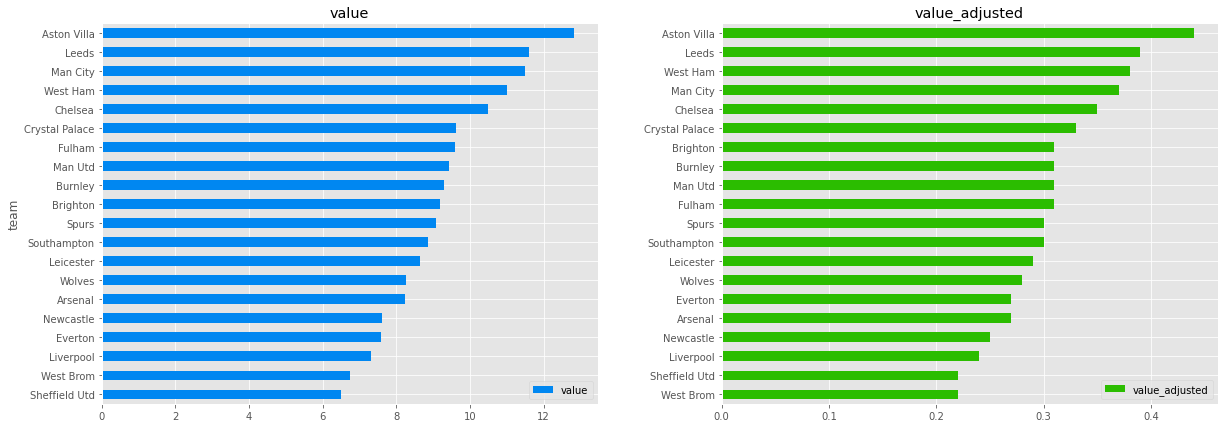

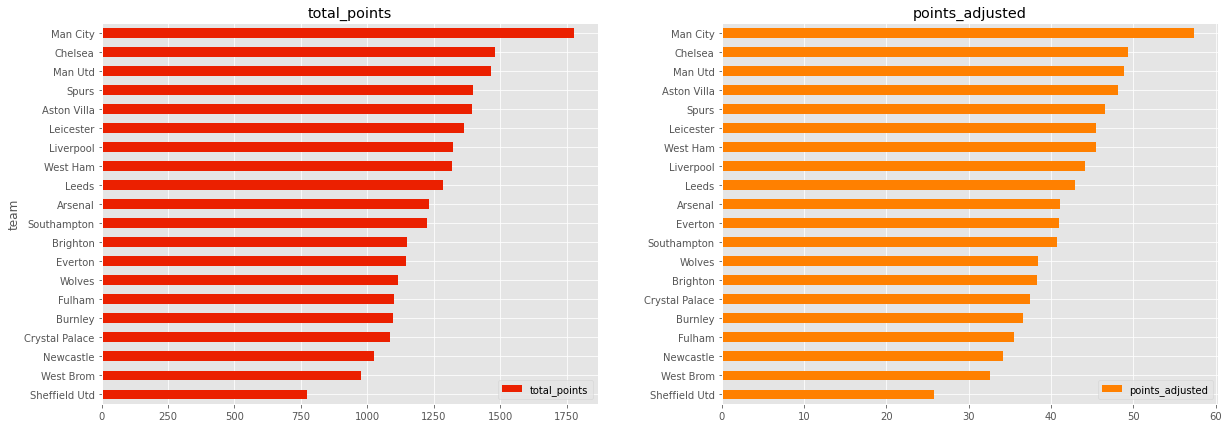

In [93]:
#Plotting graphs of value and value per game (value_adjusted)

# plot is 1 row and has to figures (2 columns)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
plt.subplots_adjust(hspace=0.25,  wspace=0.25)
#horizontal bar plot for each of the plots (axes[0] and axes[1])
team_grp_df.sort_values('value').plot.barh(ax=axes[0],x="team", y="value", subplots=True, color='#0087F1')
team_grp_df.sort_values('value_adjusted').plot.barh(ax=axes[1],x="team", y="value_adjusted", subplots=True, color='#2BBD00')
plt.ylabel("")



#Plotting graphs of total points and points per game (points_adjusted)

#graph has 1 row and 2 columns (2 graphs)
fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
plt.subplots_adjust(hspace=0.25,  wspace=0.25)

#horizontal bar plot for each of the plots (axes[0] and axes[1])
team_grp_df.sort_values('total_points').plot.barh(ax=axes[0],x="team", y="total_points", subplots=True, color='#EB2000')
team_grp_df.sort_values('points_adjusted').plot.barh(ax=axes[1],x="team", y="points_adjusted", subplots=True, color='#FF8000')
plt.ylabel("")

In [96]:
# Team data can only tell us so much so I will create 4 different dataframe's for each position
# And analyse stats within each position

#Creating Goal Keeper DataFrame:

gk_df = main_df.loc[main_df.position == 'Goalkeeper']
gk_df = gk_df[['web_name','team','selection_percentage','now_cost','clean_sheets','saves','bonus','total_points','value']]
gk_df.head(3)

,web_name,team,selection_percentage,now_cost,clean_sheets,saves,bonus,total_points,value
7,Leno,Arsenal,6.7,50,8,73,8,104,20.8
24,Ryan,Arsenal,6.0,42,2,23,0,29,6.9
30,Rúnarsson,Arsenal,0.0,44,0,2,0,1,0.2


In [97]:
# Creating Defenders DataFrame:

def_df = main_df.loc[main_df.position == 'Defender']
def_df = def_df[['web_name','team','selection_percentage','now_cost','clean_sheets','assists','goals_scored','total_contribution','ict_score','bonus','total_points','value']]
def_df.head(3)

,web_name,team,selection_percentage,now_cost,clean_sheets,assists,goals_scored,total_contribution,ict_score,bonus,total_points,value
2,David Luiz,Arsenal,0.9,54,3,0,1,1,41.0,0,40,7.4
4,Cédric,Arsenal,0.3,46,2,1,0,1,29.2,3,28,6.1
6,Mustafi,Arsenal,0.0,50,0,0,0,0,1.3,0,3,0.6


In [98]:
# Creating Midfielder DataFrame:

mid_df = main_df.loc[main_df.position == 'Midfielder']
mid_df = mid_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','total_contribution','ict_score','current_form','bonus','total_points','value']]
mid_df.head(3)

,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,bonus,total_points,value
3,Aubameyang,Arsenal,9.4,114,1,9,10,144.9,3.0,10,108,9.5
8,Xhaka,Arsenal,0.4,52,2,1,3,72.4,1.2,1,57,11.0
15,Pépé,Arsenal,1.1,76,2,5,7,93.1,2.0,3,63,8.3


In [99]:
# Creating Forward DataFrame:

fwd_df = main_df.loc[main_df.position == 'Forward']
fwd_df = fwd_df[['web_name','team','selection_percentage','now_cost','assists','goals_scored','total_contribution','ict_score','current_form','minutes','bonus','total_points','value']]
fwd_df.head(3)

,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,minutes,bonus,total_points,value
5,Lacazette,Arsenal,6.0,82,3,11,14,152.8,5.5,1707,18,111,13.5
18,Nketiah,Arsenal,0.5,54,1,1,2,24.9,0.0,317,4,27,5.0
56,Davis,Aston Villa,7.7,42,1,0,1,15.9,1.5,103,0,12,2.9


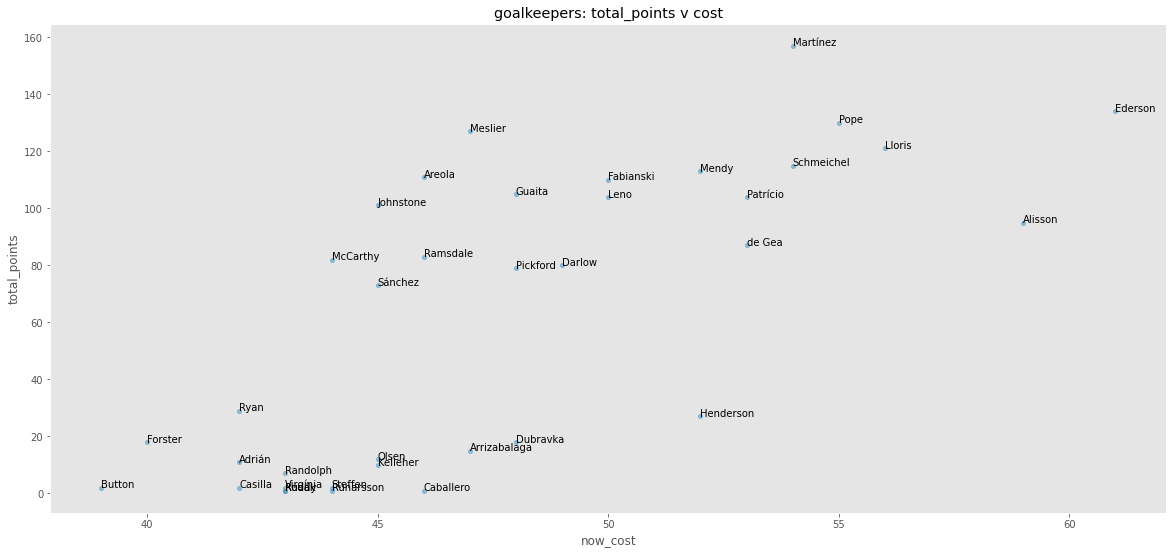

In [100]:
#Now creating graphs for players in each position

# Starting with the Goal Keepers, I will make a graph of cost vs points scored:

#scatter plot created where x is the cost column and y is the total_points column
ax = gk_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="goalkeepers: total_points v cost")
for i, txt in enumerate(gk_df.web_name):
    ax.annotate(txt, (gk_df.now_cost.iat[i],gk_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')

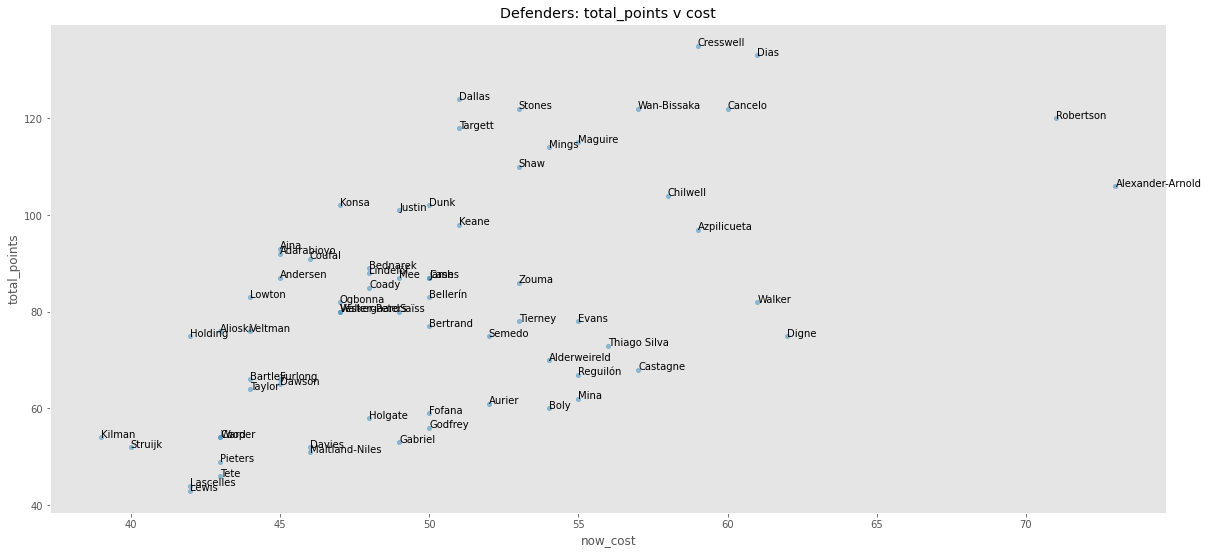

In [103]:
# As there is loads of defenders compared to goal keepers I will have to filter the defenders a bit
# Only defenders who have a value > 10 and at least 1 contribution (goal or assist) will make the graph

topdef_df = def_df = def_df.loc[def_df.value > 10]
topdef_df = topdef_df = topdef_df.loc[def_df.total_contribution > 0]

#scatter plot created where x is the cost column and y is the total_points column
ax = topdef_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="Defenders: total_points v cost")
for i, txt in enumerate(topdef_df.web_name):
    ax.annotate(txt, (topdef_df.now_cost.iat[i],topdef_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')

In [105]:
# Sometimes a defender can be playing really well and will be unlucky not to get higher points
# I will create a second graph for defenders showing which defenders should be scoring more points (and should be considered)

#ict score measures performance

#quick header of top preforming players (not necessarily highest scoring!)
unluckydef_df = def_df.loc[def_df.ict_score > 90]
unluckydef_df.sort_values('ict_score', ascending=False).head(5)

,web_name,team,selection_percentage,now_cost,clean_sheets,assists,goals_scored,total_contribution,ict_score,bonus,total_points,value
355,Alexander-Arnold,Liverpool,13.5,73,7,4,1,5,174.4,16,106,14.5
352,Robertson,Liverpool,13.3,71,9,5,1,6,169.5,13,120,16.9
417,Shaw,Man Utd,15.1,53,9,5,1,6,150.8,20,110,20.8
383,Cancelo,Man City,19.7,60,13,3,1,4,138.1,16,122,20.3
311,Dallas,Leeds,25.1,51,9,3,5,8,134.0,11,124,24.3


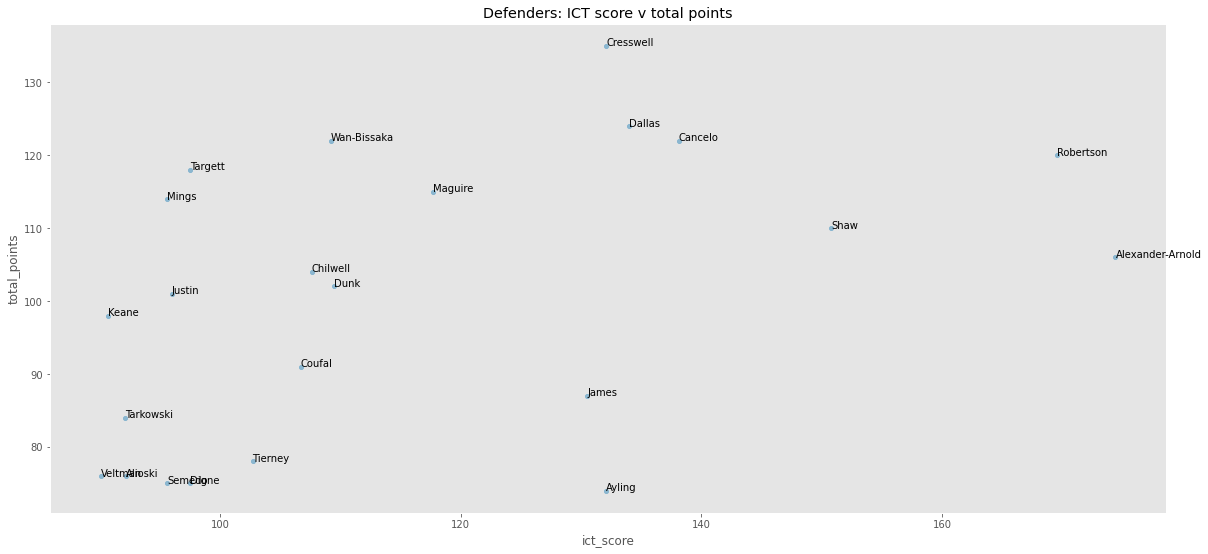

In [106]:
#scatter plot created where x is the ict score column and y is the total_points column
ax = unluckydef_df.plot.scatter(x='ict_score',y='total_points', alpha=.5, figsize=(20,9), title="Defenders: ICT score v total points")
for i, txt in enumerate(unluckydef_df.web_name):
    ax.annotate(txt, (unluckydef_df.ict_score.iat[i],unluckydef_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')

In [110]:
# Moving onto midfielders I will first make a data frame only keeping the highest preforming midfielders:

topmid_df = mid_df.loc[mid_df.ict_score > 100]
topmid_df = topmid_df.loc[mid_df.total_points > 100]
topmid_df.sort_values('total_points',ascending=False)


,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,bonus,total_points,value
418,Fernandes,Man Utd,58.3,116,13,16,29,340.1,6.0,32,214,18.4
351,Salah,Liverpool,29.4,124,4,18,22,285.7,4.3,16,182,14.7
553,Son,Spurs,43.0,94,9,13,22,233.6,1.8,22,180,19.1
422,Rashford,Man Utd,8.7,95,9,10,19,218.6,5.3,7,148,15.6
377,Gündogan,Man City,34.1,61,3,12,15,181.2,2.5,21,142,23.3
382,Sterling,Man City,5.8,113,8,9,17,223.3,1.5,10,136,12.0
381,Mahrez,Man City,7.6,82,6,9,15,197.6,5.8,15,132,16.1
43,Grealish,Aston Villa,17.3,75,12,6,18,249.1,0.0,13,129,17.2
521,Ward-Prowse,Southampton,9.8,59,5,7,12,172.9,5.5,13,128,21.7
378,De Bruyne,Man City,19.6,119,11,5,16,265.5,4.8,17,128,10.8


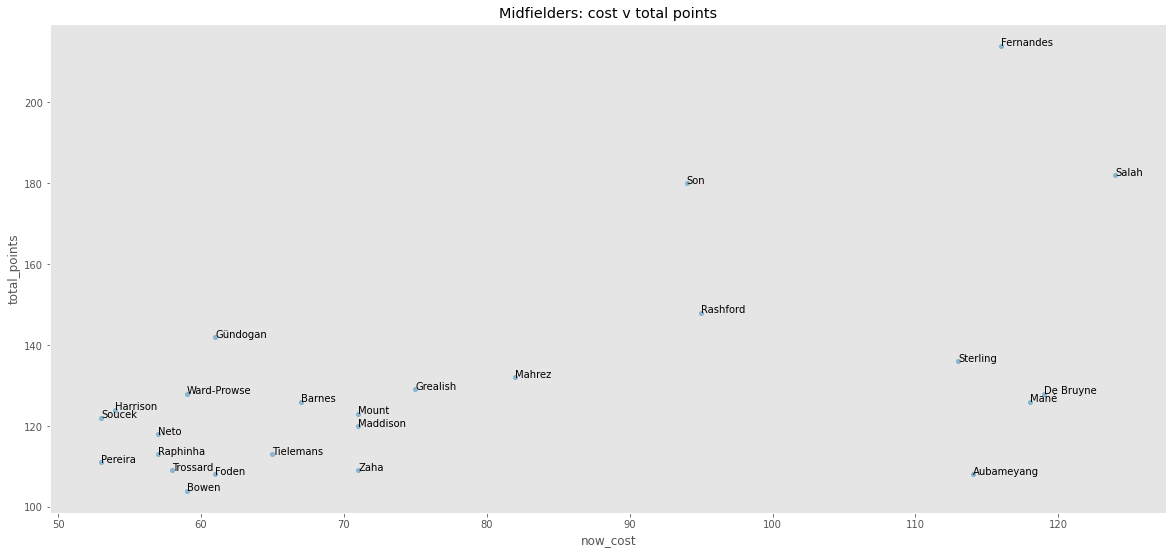

In [111]:
# graphing cost vs total points for highest preforming midfielders:

#scatter plot created where x is the cost column and y is the total_points column
ax = topmid_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="Midfielders: cost v total points")
for i, txt in enumerate(topmid_df.web_name):
    ax.annotate(txt, (topmid_df.now_cost.iat[i],topmid_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')

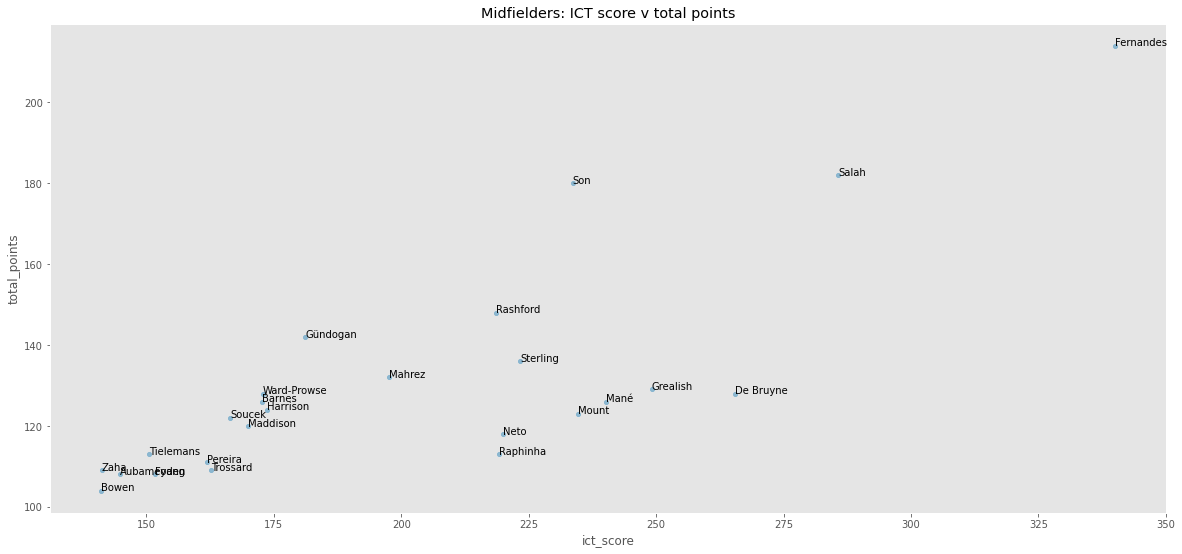

In [112]:
# Again I will try to scout out any players who haven't got as many points as they should have
# I will plot ict score vs total points scored to see if I can pick any players who may be overlooked by people

# graphing ict score vs total points for highest preforming midfielders:

#scatter plot created where x is the ict score column and y is the total_points column
ax = topmid_df.plot.scatter(x='ict_score',y='total_points', alpha=.5, figsize=(20,9), title="Midfielders: ICT score v total points")
for i, txt in enumerate(topmid_df.web_name):
    ax.annotate(txt, (topmid_df.ict_score.iat[i],topmid_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')

In [117]:
# Now finally onto forwards... I will first filter out all the forwards who haven't yet made 8 goal contributions this season

topfwd_df = fwd_df[fwd_df.total_contribution > 8]
topfwd_df.sort_values('total_points',ascending=False)                


,web_name,team,selection_percentage,now_cost,assists,goals_scored,total_contribution,ict_score,current_form,minutes,bonus,total_points,value
551,Kane,Spurs,47.4,116,13,19,32,287.2,10.2,2453,35,204,17.6
313,Bamford,Leeds,48.4,67,9,14,23,223.9,4.0,2499,19,158,23.6
278,Vardy,Leicester,18.5,101,12,12,24,187.7,5.7,2135,19,149,14.8
215,Calvert-Lewin,Everton,36.5,76,6,14,20,192.7,2.7,2151,16,136,17.9
61,Watkins,Aston Villa,26.1,66,6,11,17,240.1,4.0,2610,10,127,19.2
473,Wilson,Newcastle,5.3,65,6,10,16,134.7,0.0,1812,19,116,17.8
5,Lacazette,Arsenal,6.0,82,3,11,14,152.8,5.5,1707,18,111,13.5
527,Adams,Southampton,5.4,58,6,7,13,160.0,5.2,2165,11,109,18.8
153,Werner,Chelsea,11.1,92,9,5,14,185.6,2.7,2129,7,106,11.5
517,Ings,Southampton,6.0,84,4,9,13,152.3,3.0,1770,17,106,12.6


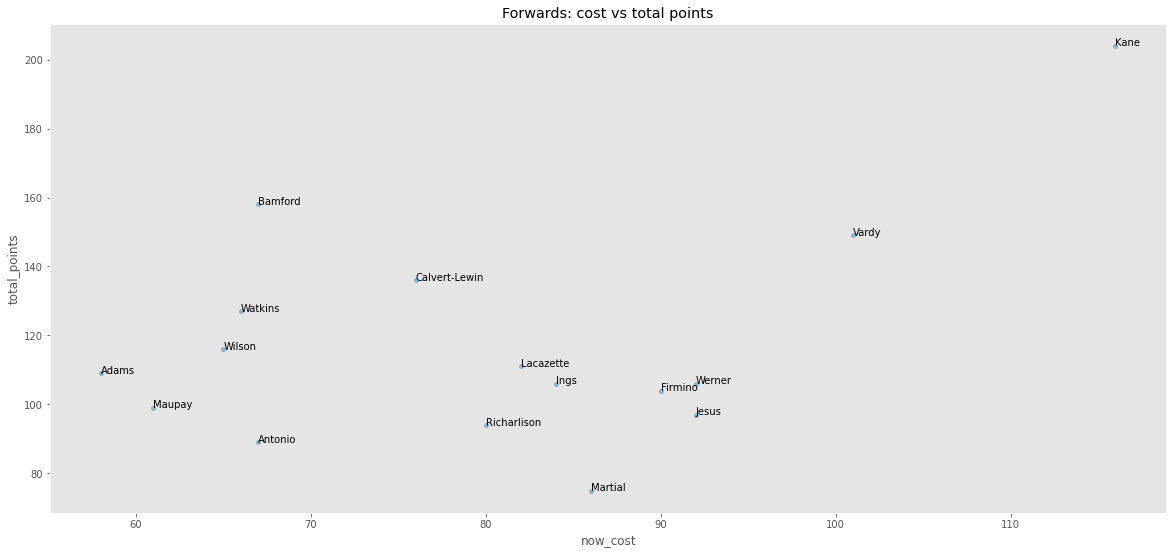

In [121]:
# graphing cost vs total points for highest preforming forwards:

#scatter plot created where x is the cost column and y is the total_points column
ax = topfwd_df.plot.scatter(x='now_cost',y='total_points', alpha=.5, figsize=(20,9), title="Forwards: cost vs total points")
for i, txt in enumerate(topfwd_df.web_name):
    ax.annotate(txt, (topfwd_df.now_cost.iat[i],topfwd_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')

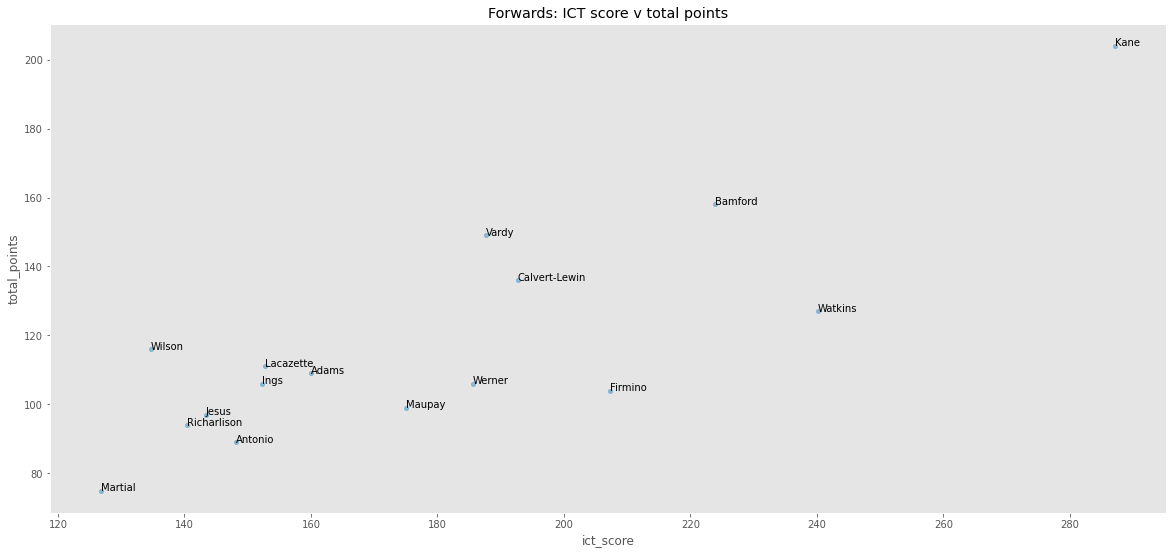

In [122]:
# Again I will check if there is any unlucky forwards who are due a goal by comparing ICT score and total points

#scatter plot created where x is the ICT score column and y is the total_points column
ax = topfwd_df.plot.scatter(x='ict_score',y='total_points', alpha=.5, figsize=(20,9), title="Forwards: ICT score v total points")
for i, txt in enumerate(topfwd_df.web_name):
    ax.annotate(txt, (topfwd_df.ict_score.iat[i],topfwd_df.total_points.iat[i]))
plt.grid(which='both', axis='both', ls='-')

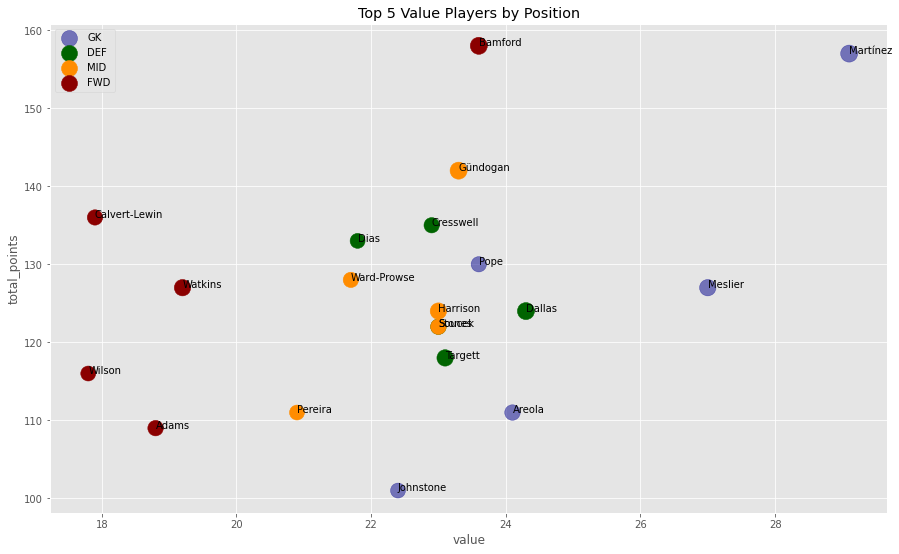

In [123]:
# Finally I will plot the top 5 value players per position

#Using nlargest() on dataframe's I will create 5 different dataframes with each one having the top value players in each position

top5_gk_df = gk_df.nlargest(5, 'value')
top5_def_df = def_df.nlargest(5, 'value')
top5_mid_df = mid_df.nlargest(5, 'value')
top5_fwd_df = fwd_df.nlargest(5, 'value')

#Plotting value vs total points

#Note ax is assigned here, however ax=ax will be used as argument for remaining scatter plots so all points will be on one graph
ax = top5_gk_df.plot.scatter(x='value', y='total_points', color='DarkBlue', label='GK', s=top5_gk_df['value']*10, alpha=.5, figsize=(15,9), title="Top 5 Value Players by Position")
for i, txt in enumerate(top5_gk_df.web_name):
    ax.annotate(txt, (top5_gk_df.value.iat[i],top5_gk_df.total_points.iat[i]))
    
top5_def_df.plot.scatter(x='value', y='total_points', color='DarkGreen', label='DEF', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_def_df.web_name):
    ax.annotate(txt, (top5_def_df.value.iat[i],top5_def_df.total_points.iat[i]))
    
top5_mid_df.plot.scatter(x='value', y='total_points', color='DarkOrange', label='MID', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_mid_df.web_name):
    ax.annotate(txt, (top5_mid_df.value.iat[i],top5_mid_df.total_points.iat[i]))
    
top5_fwd_df.plot.scatter(x='value', y='total_points', color='DarkRed', label='FWD', s=top5_gk_df['value']*10, ax=ax)
for i, txt in enumerate(top5_fwd_df.web_name):
    ax.annotate(txt, (top5_fwd_df.value.iat[i],top5_fwd_df.total_points.iat[i]))    